In [28]:
from __future__ import division, print_function, absolute_import, unicode_literals
from builtins import str

import os
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt 

DATA_PATH = os.path.abspath(os.path.join('..', '..', '..', 'Data'))

In [29]:
import matplotlib
from IPython.display import display, HTML 
%matplotlib inline
np = pd.np
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', 250)
%pprint

Pretty printing has been turned ON


In [30]:
import gzip
with gzip.open(os.path.join(DATA_PATH, 'all_tweets.csv.gz'), 'rb') as f:
    df = pd.read_csv(f, encoding='utf8', low_memory=False)
rawlen = len(df)
df.drop_duplicates('id_str', keep='last', inplace=True)
rawlen - len(df)

10308

In [31]:
with gzip.open(os.path.join(DATA_PATH, 'deduped_tweets.csv.gz'), 'rb') as f:
    df = pd.read_csv(f, encoding='utf8', low_memory=False)

In [32]:
mask = np.array([bool('date' in c) for c in df.columns])
df.columns[mask]

Index([], dtype='object')

In [33]:
df.columns[np.array([bool('time' in c) for c in df.columns])]

Index([], dtype='object')

Remember any date or time columns from Dan's tutorial?

In [34]:
mask = np.array([c.endswith('_at') for c in df.columns])
df.columns[mask]

Index([], dtype='object')

In [35]:
dates = df[df.columns[mask]]
dates

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[183070 rows x 0 columns]

In [36]:
dates = pd.DataFrame(index=df.index)
for col in df.columns[np.array([bool(c.endswith('_at')) for c in df.columns])]:
    print(col)
    dates[col] = pd.to_datetime(df[col])

In [37]:
dates

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[183070 rows x 0 columns]

In [38]:
# import gzip
# with gzip.open(os.path.join(DATA_PATH, 'datetimes.csv.gz'), 'wb') as f:
#     dates.to_csv(f)
#     # dates.to_csv(os.path.join(DATA_PATH, 'datetimes.csv.gz'), compression='gzip')

In [39]:
%ls -thal DATA_PATH
!ls -thal data

ls: cannot access 'DATA_PATH': No such file or directory
ls: cannot access 'data': No such file or directory


In [40]:
system("ls %s" % DATA_PATH)

['/bin/bash: ls %s: command not found']

In [41]:
ls -thal ../../data

ls: cannot access '../../data': No such file or directory


In [42]:
dates = pd.read_csv(os.path.join(DATA_PATH, 'datetimes.csv.gz'), engine='python')

for col in dates.columns:
    print(col)
    dates[col] = pd.to_datetime(dates[col])

Unnamed: 0
created_at
quoted_status_created_at
quoted_status_user_created_at
retweeted_status_created_at
retweeted_status_quoted_status_created_at
retweeted_status_quoted_status_user_created_at
retweeted_status_user_created_at
user_created_at


In [13]:
dates.created_at.dt.hour


0         16
1         16
2         16
3         21
          ..
183066    16
183067    16
183068    16
183069    16
Name: created_at, dtype: int64

In [8]:
dates.created_at.dt.weekday

0         6
1         6
2         6
         ..
183067    6
183068    6
183069    6
Name: created_at, dtype: int64

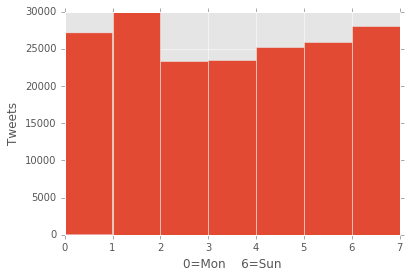

In [23]:
dow = pd.Series(dates.created_at.dt.weekday)
dow.hist(bins=[0,1,2,3,4,5,6,7])
plt.xlabel('0=Mon    6=Sun')
plt.ylabel('Tweets')

In [18]:
nums = pd.read_csv(os.path.join(DATA_PATH, 'numbers.csv.gz'), engine='python')

In [19]:
features = pd.DataFrame({'faves': nums.favorite_count, 'weekday': dow})

faves  weekday
0           0        6
1           0        6
2           1        6
...       ...      ...
183067      0        6
183068      0        6
183069      0        6

[183070 rows x 2 columns]

In [24]:
names = pd.Series([''] * len(dow), index=dow.index)
for i, label in enumerate('Mon Tues Wed Thurs Fri Sat Sun'.split()):
    names[dow == i] = label

In [33]:
faves_by_dow = pd.Series(Counter(names[nums.favorite_count > 0]))
faves_by_dow

Fri      4925
Mon      4945
Sat      4591
Sun      4971
Thurs    4399
Tues     5131
Wed      4330
dtype: int64

In [34]:
fave_ratio_by_dow = pd.Series(Counter(names[nums.favorite_count > 0])) / pd.Series(Counter(names))
fave_ratio_by_dow

Fri      0.194780
Mon      0.182197
Sat      0.177547
Sun      0.177074
Thurs    0.187447
Tues     0.171479
Wed      0.185654
dtype: float64

Keep in mind, these aren't big differences  
And we have a sample bias ("Python" in May)

Now it's your turn  
Can you do a similar analysis for Time of Day  
Hint: think of a good "bin" size  
Use tab-completion on the `dt` accessor method of the dates you are interested in  